# Data Wrangling.
###### English Premier League stats

In [1]:
#Loading the necessary libraries. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install html5lib
from pandas import read_html
import html5lib
import urllib.request as request
import urllib.parse, urllib.error
from urllib.error import HTTPError, URLError
import json
import requests
import sqlite3
from pandas import DataFrame

In [2]:
#Revisiting the prvious milestones.
#Reading the csv file
EPL_2021 = pd.read_csv('EPL_20_21.csv')
EPL_2021.head()

,Name,Club,Nationality,Position,Age,Matches,Starts,Mins,Goals,Assists,Passes_Attempted,Perc_Passes_Completed,Penalty_Goals,Penalty_Attempted,xG,xA,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [3]:
EPL_2021.shape

(532, 18)

In [4]:
EPL_2021.columns

Index(['Name', 'Club', 'Nationality', 'Position', 'Age', 'Matches', 'Starts',
       'Mins', 'Goals', 'Assists', 'Passes_Attempted', 'Perc_Passes_Completed',
       'Penalty_Goals', 'Penalty_Attempted', 'xG', 'xA', 'Yellow_Cards',
       'Red_Cards'],
      dtype='object')

In [5]:
type(EPL_2021)

pandas.core.frame.DataFrame

In [6]:
#Renaming the headers.
EPL_2021 = EPL_2021.rename(columns = {'Matches':'Matches_Played', 'Starts':'Matches_Started', 
                           'Mins':'Minutes_Played', 'Goals':'Goals_Scored', 'Assists':'Goals_Assisted', 
                           'Perc_Passes_Completed':'Pass_Completion_Percentage', 'xG':'Goals_Expected', 
                           'xA':'Actual_Goals'}) 


In [7]:
EPL_2021.head()

,Name,Club,Nationality,Position,Age,Matches_Played,Matches_Started,Minutes_Played,Goals_Scored,Goals_Assisted,Passes_Attempted,Pass_Completion_Percentage,Penalty_Goals,Penalty_Attempted,Goals_Expected,Actual_Goals,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,32,2890,6,5,1881,82.3,1,1,0.21,0.24,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,31,2745,0,0,1007,84.6,0,0,0.00,0.00,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,29,2602,6,8,826,77.2,0,0,0.41,0.21,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,27,2286,3,5,1806,78.6,0,0,0.10,0.11,3,0
4,Reece James,Chelsea,ENG,DF,20,32,25,2373,1,2,1987,85.0,0,0,0.06,0.12,3,0


In [8]:
#creating a smaller dataframe to get an overview of the player.
EPL_2021_Player_Info = EPL_2021[['Name','Club', 'Nationality', 'Position', 'Age', 'Matches_Played', 'Yellow_Cards',
       'Red_Cards' ]]

In [9]:
EPL_2021_Player_Info.head()

,Name,Club,Nationality,Position,Age,Matches_Played,Yellow_Cards,Red_Cards
0,Mason Mount,Chelsea,ENG,"MF,FW",21,36,2,0
1,Edouard Mendy,Chelsea,SEN,GK,28,31,2,0
2,Timo Werner,Chelsea,GER,FW,24,35,2,0
3,Ben Chilwell,Chelsea,ENG,DF,23,27,3,0
4,Reece James,Chelsea,ENG,DF,20,32,3,0


In [10]:
##creating a smaller dataframe to get an overview of the statistics of player.
EPL_2021_Player_Stat = EPL_2021[['Name','Club', 'Matches_Played', 'Goals_Scored', 'Goals_Assisted', 
                                 'Passes_Attempted', 'Pass_Completion_Percentage','Penalty_Goals',
                                 'Penalty_Attempted', 'Goals_Expected', 'Actual_Goals' ]]

In [11]:
EPL_2021_Player_Stat.head()

,Name,Club,Matches_Played,Goals_Scored,Goals_Assisted,Passes_Attempted,Pass_Completion_Percentage,Penalty_Goals,Penalty_Attempted,Goals_Expected,Actual_Goals
0,Mason Mount,Chelsea,36,6,5,1881,82.3,1,1,0.21,0.24
1,Edouard Mendy,Chelsea,31,0,0,1007,84.6,0,0,0.00,0.00
2,Timo Werner,Chelsea,35,6,8,826,77.2,0,0,0.41,0.21
3,Ben Chilwell,Chelsea,27,3,5,1806,78.6,0,0,0.10,0.11
4,Reece James,Chelsea,32,1,2,1987,85.0,0,0,0.06,0.12


In [12]:
#finding the missing values.
EPL_2021.isnull().sum()

Name                          0
Club                          0
Nationality                   0
Position                      0
Age                           0
Matches_Played                0
Matches_Started               0
Minutes_Played                0
Goals_Scored                  0
Goals_Assisted                0
Passes_Attempted              0
Pass_Completion_Percentage    0
Penalty_Goals                 0
Penalty_Attempted             0
Goals_Expected                0
Actual_Goals                  0
Yellow_Cards                  0
Red_Cards                     0
dtype: int64

In [13]:
#checking for NaN values.
print("The columns contains NaN - %r"%EPL_2021.columns.isnull())

The columns contains NaN - array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])


In [14]:
#Checking for duplicate values.
EPL_2021.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
527    False
528    False
529    False
530    False
531    False
Length: 532, dtype: bool

In [15]:
#There was no missing data. Looking at the box plot we can say that the concerntration is in the interval of ~500 minutes 
# to ~ 2300 minutes. Thus we can deem the vaues outside this bracket be an outliers. 
# Getting rid of outliers. 
EPL_2021 = EPL_2021[(EPL_2021['Minutes_Played'] <= 2600) & (EPL_2021['Minutes_Played'] >= 100) ]  

In [16]:
EPL_2021.shape

(376, 18)

In [17]:
#the html file.

In [21]:
url = "file:///C:/Users/dpend/Desktop/New folder/Term3-DSC540/final_week/final_milestone/Premier%20League%20Shooting%20Stats%20_%20FBref.com.html"

In [22]:
tables_list = pd.io.html.read_html(url)

In [23]:
tables_list

[                   0       1     2
 0    Manchester City  86 pts  Club
 1  Manchester United  74 pts  Club
 2          Liverpool  69 pts  Club
 3            Chelsea  67 pts  Club,
                  0       1     2
 0  Atlético Madrid  86 pts  Club
 1      Real Madrid  84 pts  Club
 2        Barcelona  79 pts  Club
 3          Sevilla  77 pts  Club,
                0       1     2
 0  Bayern Munich  78 pts  Club
 1     RB Leipzig  65 pts  Club
 2       Dortmund  64 pts  Club
 3      Wolfsburg  61 pts  Club,
                 0       1     2
 0  Internazionale  91 pts  Club
 1           Milan  79 pts  Club
 2        Atalanta  78 pts  Club
 3        Juventus  78 pts  Club,
                      0      1     2
 0               Angers  3 pts  Club
 1        Clermont Foot  3 pts  Club
 2            Marseille  3 pts  Club
 3  Paris Saint-Germain  3 pts  Club,
                   0      1     2
 0             Zenit  9 pts  Club
 1       Rubin Kazan  9 pts  Club
 2     Dynamo Moscow  9 pts  Club

In [24]:
#putting data in more readable format.
teams_list = tables_list[0]

In [25]:
teams_list

,0,1,2
0,Manchester City,86 pts,Club
1,Manchester United,74 pts,Club
2,Liverpool,69 pts,Club
3,Chelsea,67 pts,Club


In [26]:
teams_list.shape

(4, 3)

In [27]:
teams_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4 non-null      object
 1   1       4 non-null      object
 2   2       4 non-null      object
dtypes: object(3)
memory usage: 224.0+ bytes


In [28]:
teams_list.columns

Int64Index([0, 1, 2], dtype='int64')

In [29]:
type(teams_list)

pandas.core.frame.DataFrame

In [30]:
#Renaming the headers.
teams_list = teams_list.rename(columns = {'#Pl':'Players_Used', '90s':'Games_Played','Gls':'goals_scored/allowed', 'Sh':'Total_Shots', 
                           'SoT':'Shots_on_Target', 'Goals':'Goals_Scored', 'SoT%':'percentage_shots_on_target', 
                           'Sh/90':'Total_shots_in_90mins', 'G/Sh':'Goals_per_shot'
                           }) 

In [31]:
#Changing the key.
new_key = 'Club'
old_key = 0
teams_list[new_key] = teams_list.pop(old_key)

In [32]:
teams_list.head()

,1,2,Club
0,86 pts,Club,Manchester City
1,74 pts,Club,Manchester United
2,69 pts,Club,Liverpool
3,67 pts,Club,Chelsea


In [33]:
#finding the missing values.
teams_list.isnull().sum()

1       0
2       0
Club    0
dtype: int64

In [34]:
#Checking for duplicate values.
teams_list.duplicated()

0    False
1    False
2    False
3    False
dtype: bool

In [35]:
# the API.

In [36]:
#assigning a variable to the endpoint.
url = "https://heisenbug-premier-league-live-scores-v1.p.rapidapi.com/api/premierleague/table/playerstat"

In [37]:
querystring = {"stat":"assists"}

In [38]:
headers = {
    'x-rapidapi-key': "b00c493a07msh7b06a4956267d92p160773jsn66ae054fda8f",
    'x-rapidapi-host': "heisenbug-premier-league-live-scores-v1.p.rapidapi.com"
    }

In [39]:
response = requests.request("GET", url, headers=headers, params=querystring)

In [40]:
#Checing the status of the request.
response

<Response [200]>

In [41]:
#getting information about the response object.
type(response)

requests.models.Response

In [42]:
#checking the encoding of the response.
def encoding_check(r):
    return(r.encoding)

In [43]:
encoding_check(response)

'UTF-8'

In [44]:
files = response.json()

In [45]:
print(files)

{'tablestat': [{'team': 'Liverpool', 'player': 'Mohamed Salah', 'assists': 11}, {'team': 'Chelsea', 'player': 'Mason Mount', 'assists': 10}, {'team': 'Liverpool', 'player': 'Trent Alexander-Arnold', 'assists': 10}, {'team': 'West Ham', 'player': 'Jarrod Bowen', 'assists': 8}, {'team': 'Manchester City', 'player': 'Kevin De Bruyne', 'assists': 8}]}


In [46]:
#Changing the key.
new_key = 'Player_stat'
old_key = 'tablestat'

In [47]:
files[new_key] = files.pop(old_key)

In [48]:
print(files)

{'Player_stat': [{'team': 'Liverpool', 'player': 'Mohamed Salah', 'assists': 11}, {'team': 'Chelsea', 'player': 'Mason Mount', 'assists': 10}, {'team': 'Liverpool', 'player': 'Trent Alexander-Arnold', 'assists': 10}, {'team': 'West Ham', 'player': 'Jarrod Bowen', 'assists': 8}, {'team': 'Manchester City', 'player': 'Kevin De Bruyne', 'assists': 8}]}


In [49]:
#Checking with different parameters.
querystring = {"stat":"shotsOnTarget"}

headers = {
    'x-rapidapi-key': "b00c493a07msh7b06a4956267d92p160773jsn66ae054fda8f",
    'x-rapidapi-host': "heisenbug-premier-league-live-scores-v1.p.rapidapi.com"
    }
response = requests.request("GET", url, headers=headers, params=querystring)


In [50]:
files2 = response.json()

In [51]:
print(files2)

{'tablestat': [{'team': 'Liverpool', 'player': 'Mohamed Salah', 'shotsOnTarget': 57}, {'team': 'Tottenham', 'player': 'Harry Kane', 'shotsOnTarget': 55}, {'team': 'Tottenham', 'player': 'Son Heung-Min', 'shotsOnTarget': 49}, {'team': 'Manchester United', 'player': 'Cristiano Ronaldo', 'shotsOnTarget': 43}, {'team': 'Liverpool', 'player': 'Sadio Mané', 'shotsOnTarget': 37}]}


In [52]:
querystring = {"stat":"shotsBlocked"}

headers = {
    'x-rapidapi-key': "b00c493a07msh7b06a4956267d92p160773jsn66ae054fda8f",
    'x-rapidapi-host': "heisenbug-premier-league-live-scores-v1.p.rapidapi.com"
    }
response = requests.request("GET", url, headers=headers, params=querystring)


In [53]:
files3 = response.json()

In [54]:
print(files3)

{'tablestat': [{'team': 'Arsenal', 'player': 'Bukayo Saka', 'shotsBlocked': 39}, {'team': 'Tottenham', 'player': 'Harry Kane', 'shotsBlocked': 36}, {'team': 'Liverpool', 'player': 'Mohamed Salah', 'shotsBlocked': 34}, {'team': 'Manchester United', 'player': 'Bruno Fernandes', 'shotsBlocked': 34}, {'team': 'Liverpool', 'player': 'Sadio Mané', 'shotsBlocked': 31}]}


In [55]:
#Loading the datasets into database.

In [56]:
conn = sqlite3.connect("Player_Details.db")
c= conn.cursor()

In [57]:
#Creating a table EPL_2021_Player_Stat with the primary key "Name"
c.execute("CREATE TABLE EPL_2021_Player_Stat(Name, Club, Matches_Played, Goals_Scored, Goals_Assisted, Goals_Expected, Actual_Goals, PRIMARY KEY (Name))")
conn.commit()

OperationalError: table EPL_2021_Player_Stat already exists

In [58]:
EPL_2021_Player_Info.to_sql('EPL_2021_Player_Stat', conn, if_exists='replace', index= False)

In [59]:
c.execute('SELECT * FROM EPL_2021_Player_Stat')

In [60]:
for row in c.fetchall():
    print(row)

('Mason Mount', 'Chelsea', 'ENG', 'MF,FW', 21, 36, 2, 0)
('Edouard Mendy', 'Chelsea', 'SEN', 'GK', 28, 31, 2, 0)
('Timo Werner', 'Chelsea', 'GER', 'FW', 24, 35, 2, 0)
('Ben Chilwell', 'Chelsea', 'ENG', 'DF', 23, 27, 3, 0)
('Reece James', 'Chelsea', 'ENG', 'DF', 20, 32, 3, 0)
('César Azpilicueta', 'Chelsea', 'ESP', 'DF', 30, 26, 5, 1)
("N'Golo Kanté", 'Chelsea', 'FRA', 'MF', 29, 30, 7, 0)
('Jorginho', 'Chelsea', 'ITA', 'MF', 28, 28, 2, 0)
('Thiago Silva', 'Chelsea', 'BRA', 'DF', 35, 23, 5, 1)
('Kurt Zouma', 'Chelsea', 'FRA', 'DF', 25, 24, 3, 0)
('Mateo Kovačić', 'Chelsea', 'CRO', 'MF', 26, 27, 4, 0)
('Antonio Rüdiger', 'Chelsea', 'GER', 'DF', 27, 19, 0, 0)
('Christian Pulisic', 'Chelsea', 'USA', 'FW,MF', 21, 27, 2, 0)
('Kai Havertz', 'Chelsea', 'GER', 'MF,FW', 21, 27, 2, 0)
('Andreas Christensen', 'Chelsea', 'DEN', 'DF', 24, 17, 2, 1)
('Hakim Ziyech', 'Chelsea', 'MAR', 'FW,MF', 27, 23, 3, 0)
('Tammy Abraham', 'Chelsea', 'ENG', 'FW', 22, 22, 0, 0)
('Marcos Alonso', 'Chelsea', 'ESP', 'DF'

In [61]:
#creating  a table Team_List with the foreign key "Club"
with sqlite3.connect("Player_Details.db") as conn:
    cursor = conn.cursor()
    cursor.execute("PRAGMA foreign_keys =1")
    sql = """CREATE TABLE Team_List ( Club, Points, Foreign KEY (Club) REFERENCES EPL_2021_Player_Stat (Club)
    ON DELETE CASCADE ON UPDATE NO ACTION)"""
    cursor.execute(sql)
    conn.commit()

OperationalError: table Team_List already exists

In [62]:
teams_list.to_sql('Team_List', conn, if_exists='replace', index= False)

In [63]:
c.execute('SELECT * FROM Team_List')

In [64]:
for row in c.fetchall():
    print(row)

('86 pts', 'Club', 'Manchester City')
('74 pts', 'Club', 'Manchester United')
('69 pts', 'Club', 'Liverpool')
('67 pts', 'Club', 'Chelsea')


In [65]:
connection = sqlite3.connect("Player_Details.db")
for Name, Club in connection.execute("SELECT count(*), Club FROM EPL_2021_Player_Stat GROUP BY Club"):
    print("{} has {} player.".format(Club,Name))

Arsenal has 29 player.
Aston Villa has 24 player.
Brighton has 27 player.
Burnley has 25 player.
Chelsea has 27 player.
Crystal Palace has 24 player.
Everton has 29 player.
Fulham has 28 player.
Leeds United has 23 player.
Leicester City has 27 player.
Liverpool FC has 28 player.
Manchester City has 24 player.
Manchester United has 29 player.
Newcastle United has 27 player.
Sheffield United has 27 player.
Southampton has 29 player.
Tottenham Hotspur has 24 player.
West Bromwich Albion has 30 player.
West Ham United has 24 player.
Wolverhampton Wanderers has 27 player.


In [66]:
#Creating a join between the EPL_2021_Player_Stat table and the Team_List table.
connection = sqlite3.connect("Player_Details.db")
connection.execute("PRAGMA foreign_keys = 1")
query = """SELECT * FROM Team_List JOIN EPL_2021_Player_Stat ON Team_List.Club = EPL_2021_Player_Stat.Club WHERE EPL_2021_Player_Stat.Club = 'Chelsea'""" 
connection.execute(query)
rows = cursor.fetchall()
rows
    


[]

{'whiskers': [<matplotlib.lines.Line2D at 0x24997441cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x249974583d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x24997441970>],
 'medians': [<matplotlib.lines.Line2D at 0x24997458a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x24997458df0>],
 'means': []}

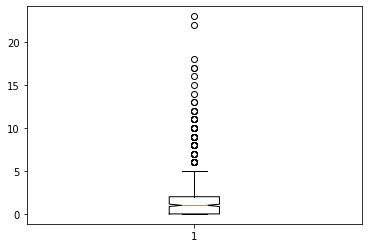

In [67]:
#Plotting the box plot.
plt.boxplot(EPL_2021_Player_Stat.Goals_Scored, notch = True)

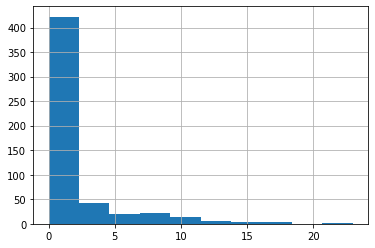

In [68]:
hist_GoalsScored = EPL_2021_Player_Stat.Goals_Scored
hist = hist_GoalsScored.hist(bins = 10)

Text(0, 0.5, 'Goals_Assisted')

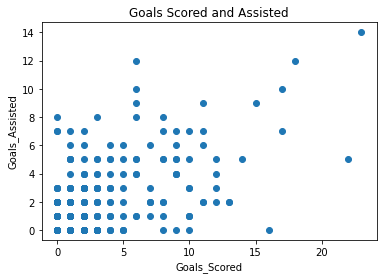

In [69]:
fig, ax = plt.subplots()
ax.scatter(EPL_2021_Player_Stat['Goals_Scored'], EPL_2021_Player_Stat['Goals_Assisted'])
ax.set_title('Goals Scored and Assisted')
ax.set_xlabel('Goals_Scored')
ax.set_ylabel('Goals_Assisted')